In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv("intents_data.csv")
df.head(5)

Text      Intent
0  hello  small_talk
1     hi  small_talk
2    hey  small_talk
3     yo  small_talk
4   heya  small_talk

In [40]:
df.Intent.value_counts()

small_talk    1000
quit          1000
thanks        1000
help          1000
predict       1000
get           1000
set           1000
calculate     1000
definition    1000
Name: Intent, dtype: int64

In [41]:
df.isna().sum()

Text      0
Intent    0
dtype: int64

In [42]:
intent = df.Intent.map({
    "small_talk": 0,
    "thanks": 1, 
    "help": 2,     
    "predict": 3,
    "get": 4,
    "set": 5,        
    "calculate": 6,
    "definition": 7,
    "quit": 8
})

intent

0       0
1       0
2       0
3       0
4       0
       ..
8995    7
8996    7
8997    7
8998    7
8999    7
Name: Intent, Length: 9000, dtype: int64

In [43]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [44]:
def preprocess(text):
    doc = nlp(text)

    filter_word = []

    for token in doc:
        # if token.is_stop or token.is_punct:
        #     continue
        filter_word.append(token.lemma_)

    return " ".join(filter_word)

In [45]:
text = df.Text.apply(preprocess)

In [46]:
text

0                                 hello
1                                    hi
2                                   hey
3                                    yo
4                                  heya
                     ...               
8995                      word ' word '
8996            technical term ' word '
8997    let ' word ' define simple term
8998                   clarify ' word '
8999                      ' word ' mean
Name: Text, Length: 9000, dtype: object

In [47]:
df1 = pd.concat([text, intent], axis="columns")

In [48]:
df1

Text  Intent
0                               hello       0
1                                  hi       0
2                                 hey       0
3                                  yo       0
4                                heya       0
...                               ...     ...
8995                    word ' word '       7
8996          technical term ' word '       7
8997  let ' word ' define simple term       7
8998                 clarify ' word '       7
8999                    ' word ' mean       7

[9000 rows x 2 columns]

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
v = CountVectorizer()

x = v.fit_transform(df1.Text.values).toarray()

In [51]:
y = df1.Intent

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=df1.Intent)

## Machine Learning

In [53]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.9405555555555556
              precision    recall  f1-score   support

           0       0.70      0.95      0.81       200
           1       0.97      0.93      0.95       200
           2       0.96      0.98      0.97       200
           3       0.98      1.00      0.99       200
           4       1.00      0.97      0.99       200
           5       1.00      1.00      1.00       200
           6       1.00      0.81      0.90       200
           7       1.00      1.00      1.00       200
           8       0.96      0.81      0.88       200

    accuracy                           0.94      1800
   macro avg       0.95      0.94      0.94      1800
weighted avg       0.95      0.94      0.94      1800



In [54]:
{
    "small_talk": 0,
    "thanks": 1, 
    "help": 2,     
    "predict": 3,
    "get": 4,
    "set": 5,
    "calculate": 6,
    "definition": 7,
    "quit": 8
}

phrases = "hey, chat predict for me the turnover, the asset, the liability, the balance sheet for 2030, 2035 and in 5 years"

phrases_t = v.transform([preprocess(phrases)]).toarray()
print(model.predict(phrases_t))
print(model.predict_proba(phrases_t))

[3]
[[1.37225822e-02 4.33725193e-05 5.66931639e-06 9.85499935e-01
  4.43179193e-04 6.02816679e-07 3.59107390e-05 1.90571267e-06
  2.46843015e-04]]


Text(45.722222222222214, 0.5, 'Truth')

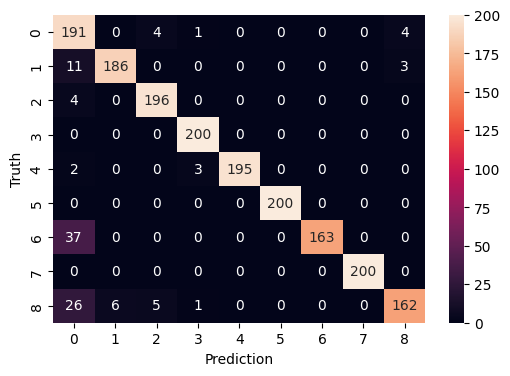

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (6,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [56]:
from  sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.9438888888888889
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       200
           1       0.97      0.97      0.97       200
           2       0.74      1.00      0.85       200
           3       0.96      1.00      0.98       200
           4       1.00      0.89      0.94       200
           5       1.00      1.00      1.00       200
           6       0.99      0.81      0.90       200
           7       1.00      1.00      1.00       200
           8       0.98      0.85      0.91       200

    accuracy                           0.94      1800
   macro avg       0.95      0.94      0.94      1800
weighted avg       0.95      0.94      0.94      1800



In [57]:
from  sklearn.svm import SVC

model = SVC(probability=True)

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.9744444444444444
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       200
           1       0.99      0.96      0.97       200
           2       0.99      0.98      0.99       200
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00       200
           6       0.86      1.00      0.93       200
           7       1.00      1.00      1.00       200
           8       0.98      0.86      0.92       200

    accuracy                           0.97      1800
   macro avg       0.98      0.97      0.97      1800
weighted avg       0.98      0.97      0.97      1800



In [64]:
{
    "small_talk": 0,
    "thanks": 1, 
    "help": 2,     
    "predict": 3,
    "get": 4,
    "set": 5,
    "calculate": 6,
    "definition": 7,
    "quit": 8
}

phrases = "hhh"

phrases_t = v.transform([preprocess(phrases)]).toarray()
print(model.predict(phrases_t))
print(model.predict_proba(phrases_t))

[6]
[[0.21157979 0.04418466 0.07551445 0.         0.         0.
  0.47118213 0.         0.19753897]]


In [59]:
from  sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.9744444444444444
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       200
           1       0.97      0.97      0.97       200
           2       0.99      0.98      0.99       200
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00       200
           6       0.86      1.00      0.93       200
           7       1.00      1.00      1.00       200
           8       1.00      0.85      0.92       200

    accuracy                           0.97      1800
   macro avg       0.98      0.97      0.97      1800
weighted avg       0.98      0.97      0.97      1800



In [60]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.9744444444444444
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       200
           1       0.97      0.97      0.97       200
           2       0.99      0.98      0.99       200
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00       200
           6       0.86      1.00      0.93       200
           7       1.00      1.00      1.00       200
           8       1.00      0.85      0.92       200

    accuracy                           0.97      1800
   macro avg       0.98      0.97      0.97      1800
weighted avg       0.98      0.97      0.97      1800



In [65]:
{
    "small_talk": 0,
    "thanks": 1, 
    "help": 2,     
    "predict": 3,
    "get": 4,
    "set": 5,
    "calculate": 6,
    "definition": 7,
    "quit": 8
}

phrases = "what is the forecast of operating result"

phrases_t = v.transform([preprocess(phrases)]).toarray()
print(model.predict(phrases_t))
print(model.predict_proba(phrases_t))

[6]
[[0.   0.   0.   0.18 0.   0.   0.82 0.   0.  ]]


In [62]:
# import joblib

# Save the model
# joblib.dump(model, "intent_classification_model")

## Deep Learning